In [1]:
# -*- coding: utf-8 -*-
"""
"""
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like #datareader problem probably fixed in next version of datareader
from pandas_datareader import data as pdr
import datetime
import numpy as np
import fix_yahoo_finance as yf
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import linear_model

In [2]:
yf.pdr_override() # <== that's all it takes :-)


start_date=datetime.date(1980, 12, 12)
end_date= datetime.date(2019, 4, 1)

stock_list = ["AAPL"]

stock_str = ""
for i in range(len(stock_list)):
    stock_str  = stock_str + stock_list[i] + "."

main_df = pd.DataFrame()

for stock in range(len(stock_list)):
  df = pdr.get_data_yahoo(stock_list[stock], start=start_date, end=end_date) 
  #df.drop(['Close','High', 'Low' , 'Open', 'Volume'], axis=1, inplace=True)
  df.rename(columns={'Adj Close': 'Adj_close'}, inplace=True)
  if main_df.empty:
    main_df = df
  else:
    main_df = main_df.join(df) 
           
#main_df["Date"]=main_df.index
main_df.reset_index(level=0, inplace=True)

[*********************100%***********************]  1 of 1 downloaded


In [3]:
df=main_df
df.head()



,Date,Open,High,Low,Close,Adj_close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.023007,117258400
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.021807,43971200
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.020206,26432000
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.020706,21610400
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.021307,18362400


In [4]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj_close           float64
Volume                int32
dtype: object

In [5]:
#df=df.iloc[:,1:7]
df=df.drop(columns="Date")

In [6]:
df.head()

,Open,High,Low,Close,Adj_close,Volume
0,0.513393,0.515625,0.513393,0.513393,0.023007,117258400
1,0.488839,0.488839,0.486607,0.486607,0.021807,43971200
2,0.453125,0.453125,0.450893,0.450893,0.020206,26432000
3,0.462054,0.464286,0.462054,0.462054,0.020706,21610400
4,0.475446,0.477679,0.475446,0.475446,0.021307,18362400


In [7]:
df["pred"]=df["Adj_close"].shift(-1)

In [8]:
len(df)*.9

8690.4

In [16]:
df=df.dropna()
train_df=df.iloc[:9500,:]
test_df=df.iloc[9500:,:]

train_df.head()
test_df.head()

,Open,High,Low,Close,Adj_close,Volume,pred
9500,211.750000,213.809998,211.470001,213.320007,211.670471,28500400,215.897522
9501,213.440002,217.949997,213.160004,217.580002,215.897522,35427000,213.793930
9502,218.100006,219.179993,215.110001,215.460007,213.793930,30287700,213.377167
9503,216.800003,217.190002,214.029999,215.039993,213.377167,26159800,213.387085
9504,214.100006,216.360001,213.839996,215.050003,213.387085,19018100,213.823685


In [17]:
params = {
    'n_estimators': 1,
    'max_depth': 10,
    'learning_rate': 1,
    'criterion': 'mse'
}

In [18]:
gbt = ensemble.GradientBoostingRegressor(**params)

In [19]:
x=train_df.drop(columns="pred")
y=train_df["pred"]

In [20]:
gbt.fit(x, y)


GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=1, loss='ls', max_depth=10, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [21]:
test_x=test_df.drop(columns="pred")
test_y=test_df["pred"].reset_index()
test_y=test_y.drop(columns="index")


predictions =gbt.predict(test_x)

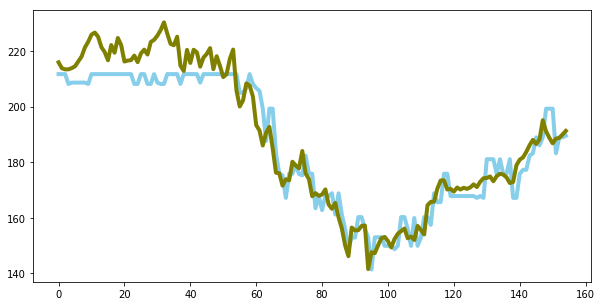

In [22]:
plt.figure(figsize=(10, 5))
plt.plot( predictions, color='skyblue', linewidth=4)
plt.plot(test_y, color='olive', linewidth=4)
plt.show()

In [ ]:
test_y.head()

In [ ]:
train_predictions =gbt.predict(x)

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot( train_predictions, color='skyblue', linewidth=4)
plt.plot(y, color='olive', linewidth=4)
plt.show()